In [227]:
import cv2 # should be 4.7
import glob
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

print( cv2.__version__)

4.7.0


In [228]:


# OUR FINAL CAMERA CALIBRATION MATRIX
calibration = 0.6442544274536695
cameraMatrix = np.array([[932.35252209,   0.,         657.24325896],
 [  0.,         930.23581552, 357.42939289],
 [  0.,           0.,           1.        ]])
distCoeffs = np.array([[ 1.76279343e-01, -6.07952723e-01, -4.64176532e-04, -4.96839648e-04, 6.04867450e-01]])

In [229]:
def produce_cube_points(x, z):
    y = 1.3
    A = np.array([[x, y, z],
                  [x, y -  6., z],
                  [x - 6., y -  6., z],
                  [x - 6., y, z],
                  [x, y, z + 6.],
                  [x, y -  6., z + 6.],
                  [x - 6., y -  6., z + 6.],
                  [x - 6., y, z + 6.]])
    return A

def changeCoordinates(point, movement):
    angle = - movement[2]
    x_translation = - movement[0]
    z_translation = - movement[1]
    Rxz = np.array([[np.cos(angle), 0, -np.sin(angle)],
                    [0, 1, 0],
                    [np.sin(angle), 0, np.cos(angle)]])

    # Apply the rotation matrix to point P
    point_rotated = np.dot(Rxz, point)

    # Translate the coordinates of P by x and z
    return point_rotated + np.array([x_translation, 0, z_translation])

# changes the point coordiantes in relation to reverse movement
# works only for circle movement!!!
def rm(point, movement):
    movement2 = np.array([0, - np.sqrt(movement[1] * movement[1] + movement[0] * movement[0]), - movement[2]])
    return changeCoordinates(point, movement2)

def points_with_movement(x, z, movement):
    A = produce_cube_points(x, z)
    for i in range(len(A)):
        A[i] = changeCoordinates(A[i], movement)
    return A

20
[[0.05929721610717288, 0.05, 0.2], array([0.27283269, 0.05      , 0.24091283]), array([0.41503198, 0.05      , 0.0764421 ]), array([ 0.39137243,  0.05      , -0.07038764]), array([ 0.0642171 ,  0.05      , -0.13306973]), array([0.19828528, 0.05      , 0.2529251 ]), [0.06659432846880932, -0.07, 0.3], array([ 0.16518424, -0.07      ,  0.33018973]), array([ 0.43852381, -0.07      ,  0.21430684]), array([ 0.33639868, -0.07      , -0.22894146]), array([-0.0355308, -0.07     , -0.1432483]), array([-0.08238184, -0.07      , -0.05139858]), array([ 0.06659433, -0.07      ,  0.3       ]), [-0.05643807067744328, -0.02, 0.35], array([ 0.06667261, -0.02      ,  0.41925391]), array([ 0.34486886, -0.02      ,  0.41614253]), array([ 0.60122374, -0.02      , -0.03957214]), array([ 0.55143105, -0.02      , -0.17175773]), array([ 0.19694796, -0.02      , -0.37116643]), array([ 0.05812415, -0.02      , -0.34508399]), array([-0.06340684, -0.02      , -0.27309397]), array([-0.19823073, -0.02      ,  0.11

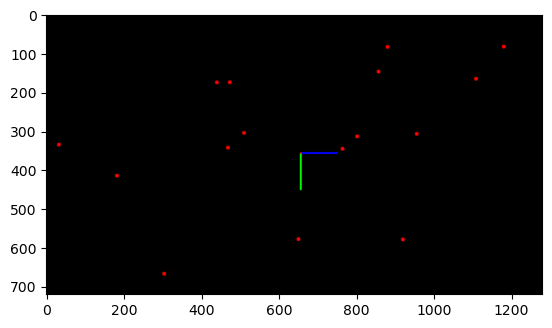

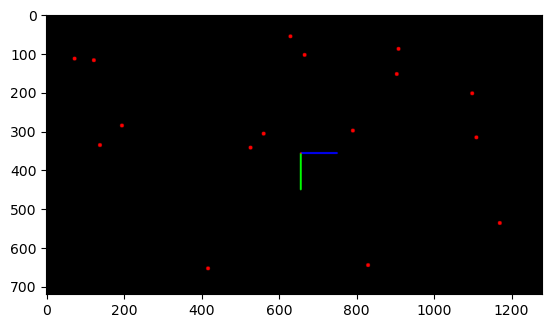

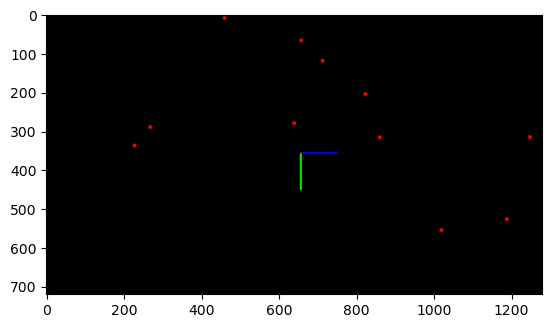

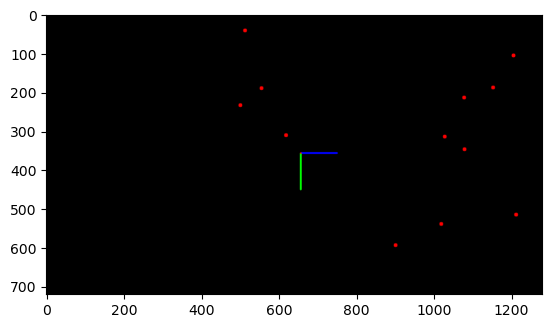

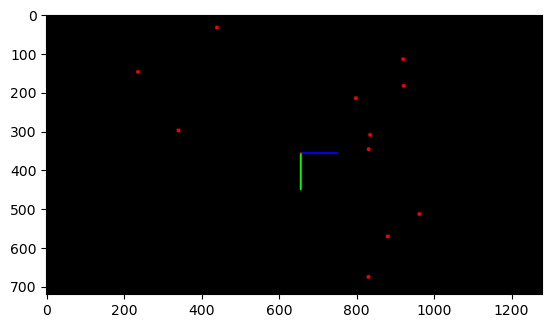

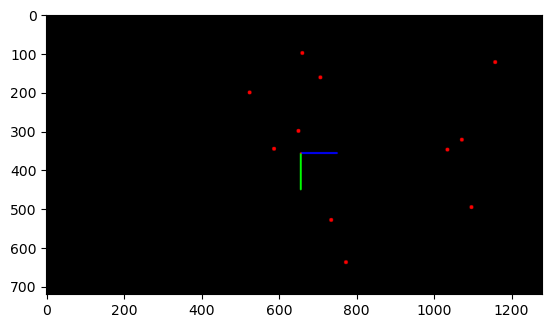

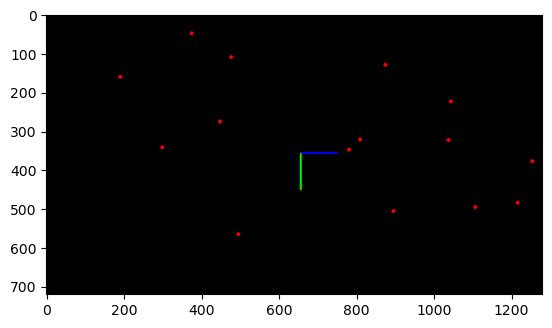

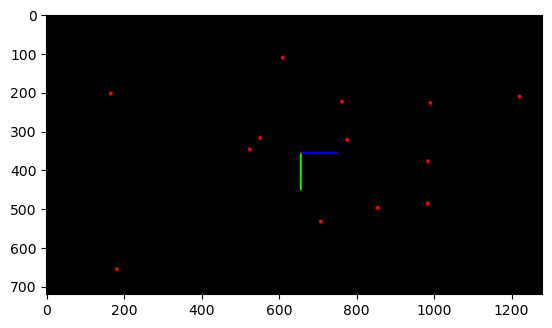

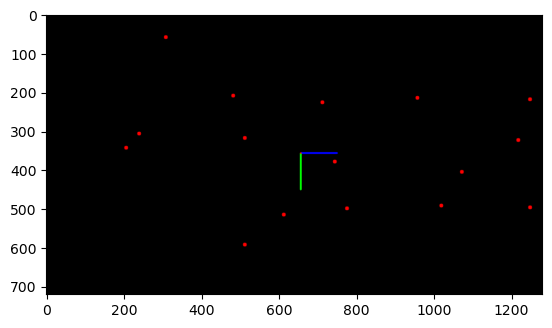

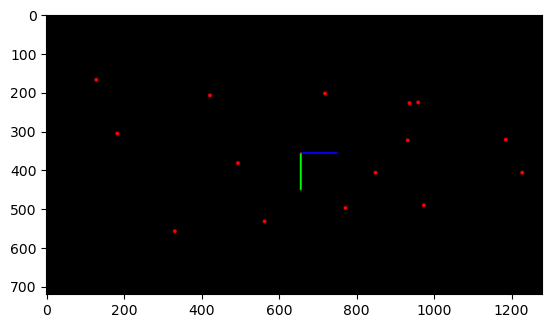

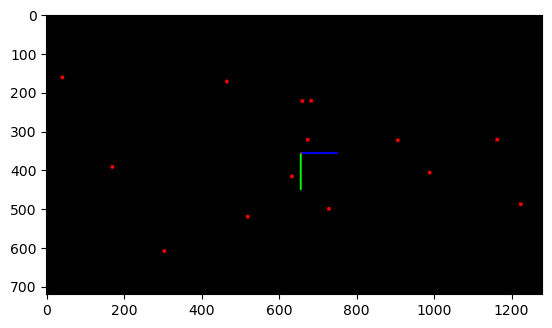

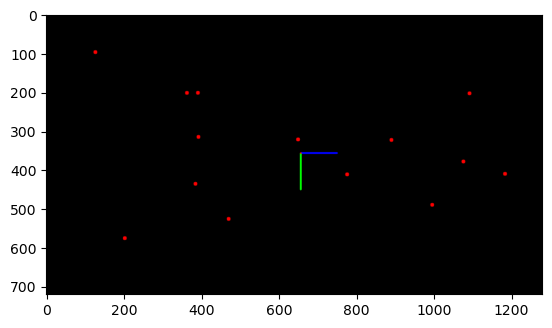

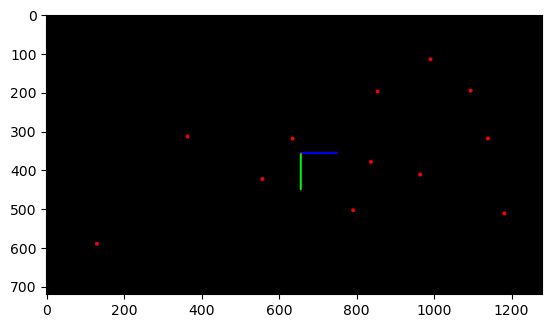

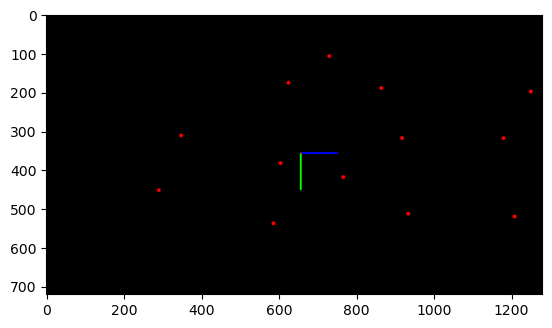

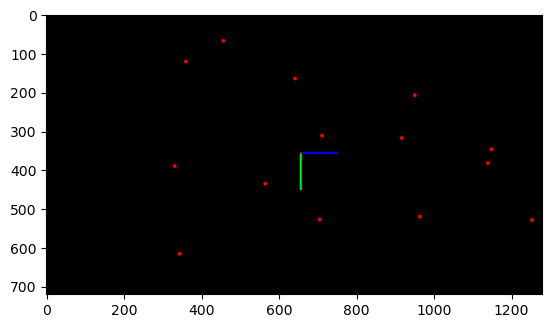

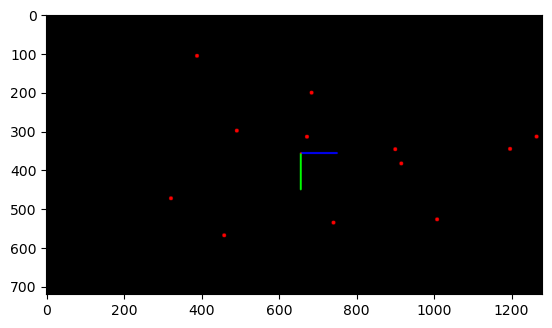

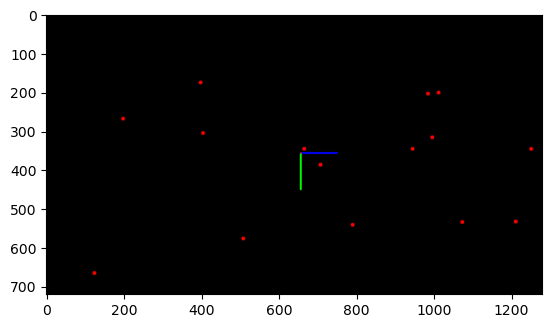

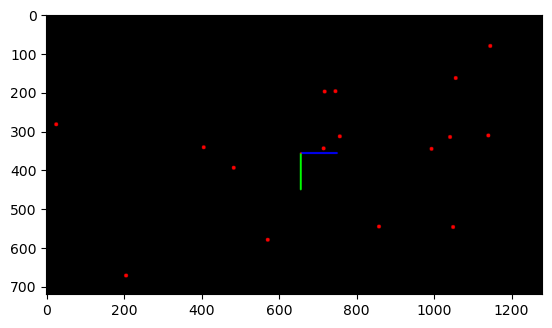

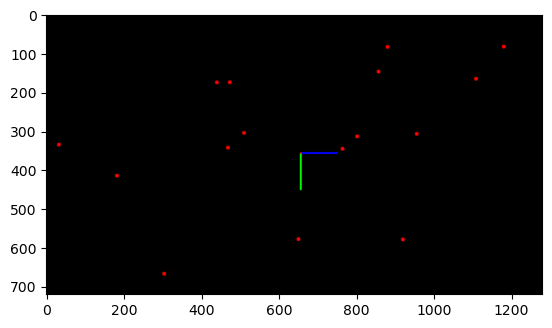

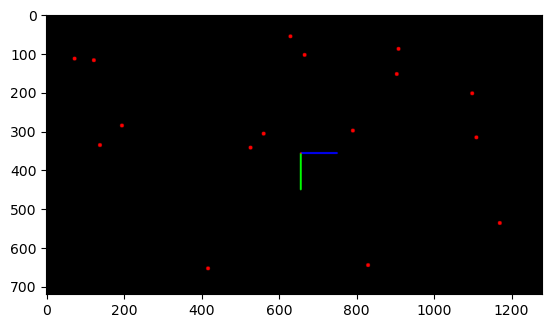

In [230]:
RELATIVE_PATH_CUBE = '../test_data_sets/staircase/source_photos/*.jpg'
images_cube = sorted(glob.glob(RELATIVE_PATH_CUBE))
print(len(images_cube))

# Change depending on movement !!
ROTATION = - np.pi / 9   # in radians
XMOVEMENT = - 0.0427171547           # in meters
ZMOVEMENT = 0.0567852171           # in meters

def move_points(points, movement):
    points_moved = []
    for point in points:
        points_moved.append(changeCoordinates(point, movement))
    return points_moved

movement = [XMOVEMENT, ZMOVEMENT, ROTATION]

# points_doors_0 = [  
#                     [0.57, 0.06, 0.002], [0.256, 0.056, 0.105], [0.555, -0.11, -0.15],
#                     [-0.301, 0.309, 1.08], [-15., -0.21, 2.5], [-2.4, -0.343, 1.53], [0.002, 0.01, 7.6],
#                     [-2.06, 0.54, -3.097], [-1.054, -0.265, -1.09], [-1.044, -0.2099, -3.06], [-2.109, 0.516, -1.15],
#                     [-1.23, -1.002, -3.2], [-1.22, -1.53, -6.04], [-1.01, -1.02, -5.503], [-1.494, -1.295, -4.06],
#                     [-3.12, -0.311, -0.111], [-4.32, -0.1001, -0.0302], [-1.52, 0.11, 0.102], [-3.11, -0.35, 0.13],
#                     [-3.4, -3.3, -0.4], [-4.2, -2.1, -0.43], [-1.25, -1.1, 4.1], [-3.1, -2.452, 4.1],
#                     [0.5, -0.35, 4.3], [-0.3, -0.35, 4.3], [-0.3, -1.252, 4.3], [0.5, -1.25, 4.3],
#                     [0.89, 0.0, 1.25], [1.192, 0.0, 1.25], [1.19, -0.3, 1.25], [0.89, -0.2, 1.25],
#                     [0.33, 0.0, 0.25], [0.4, 0.0, 0.25], [1.10, 0.3, 1.25], [0.80, -0.5, 1.5],
#                     [0.5, 0.04, -7.], [1.2, 2.06, -6.], [1.10, 0.37, 1.], [0.80, -1.28, -1.5],
#                     [0.1, 0.2, 0.0], [0.2, 0.3, 0.1], [1.10, 0.3, 1.25], [0.80, -0.5, 1.509],
#                     [-0.31, 0.1, 0.25], [-2.055, 0.0, -0.25], [1.10, 0.306, -1.25], [-0.80, -0.5, 1.5],
#                     [0.3, 0.003, 0.25], [0.4, 0.003, 0.25], [1.101, 0.304, 1.25], [0.803, -0.5, 1.5]
#                 ]

base_points =   [
                    [0.05, 0.05, 0.2], 
                    [0.04, -0.07, 0.3], [-0.03, -0.02, 0.35],
                    [-0.05, 0.01, 0.15], [-0.04, 0.07, 0.2], [-0.1, -0.1, 0.5],
                    [-0.1, -0.005, 0.2], [-0.04, 0.07, 0.2], [-0.1, -0.1, 0.5],
                    [0.2, -0.015, 0.25], [0.04, 0.02, 0.2], [0.1, -0.15, 0.5],
                ]

points_doors_0 = []

import random

for i in range(len(base_points)):
    previous_point = base_points[i]
    random_number = random.random()
    previous_point[0] += (random_number * previous_point[0])
    for j in range(21):
        # append point with probability 0.2
        if random.random() < 0.2:
            points_doors_0.append(previous_point)
        previous_point = rm(previous_point, movement)

print(points_doors_0)

current = points_doors_0
points3D = []
for i in range(21):
    points3D.append(current)
    current = move_points(current, movement)

points3dOnCube = np.array(points3D)

points3dOnCube *= 100

count = 0

all_drawed_points = []

for i in range(len(images_cube)):
    if i <= 100:
        points3dOnCube1 = points3dOnCube[i]
        
        # img = cv2.imread(images_cube[i])
        # Create a black rectangle with the same size as the first image
        img = np.zeros_like(cv2.imread(images_cube[0]))

        # Draw a black rectangle with the same size as the first image
        cv2.rectangle(img, (0, 0), (img.shape[1], img.shape[0]), (0, 0, 0), -1)
        
        img = cv2.drawFrameAxes(img, cameraMatrix, distCoeffs, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 0.1) # draw the chessboard coordinate system

        # project the 3D point onto the image
        point_2d, _ = cv2.projectPoints(points3dOnCube1, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), cameraMatrix, distCoeffs)

        # round the pixel coordinates to integers
        point_2d = np.round(point_2d).astype(np.int32)
        # print(points3dOnCube1)
        # print(point_2d)
        
        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
    
        drawed_points = []
        j = 0
        for x, y in point_2d[:,0,:]:
            if points3dOnCube1[j][2] > 0 and x >= 0 and x <= 1280 and y >= 0 and y <= 720:
                drawed_points.append([j, points3dOnCube1[j]])
                img = cv2.circle(img, (x, y), radius=5, color=(255,0,0), thickness=-1)
            j += 1

        all_drawed_points.append(drawed_points)

        img = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix) # undistort the image (get's crazy)

        # uncomment this to see the result!
        plt.imshow(img)
        plt.show()
    
    count += 1



In [231]:
# all_drawed_points = np.array(all_drawed_points)
# print(all_drawed_points.shape)

print("[", end="")
for i in range(len(all_drawed_points)):
    print("[", end="")
    for j in range(len(all_drawed_points[i])):
        print("(", end="")
        print(all_drawed_points[i][j][0], end=", [")
        for k in range(3):
            print(round(all_drawed_points[i][j][1][k] / 100, 4), end=", ")
        print("])", end=",")
    print("]", end=",\n")
print("]", end="\n")


[[(0, [0.0593, 0.05, 0.2, ]),(6, [0.0666, -0.07, 0.3, ]),(7, [0.1652, -0.07, 0.3302, ]),(12, [0.0666, -0.07, 0.3, ]),(13, [-0.0564, -0.02, 0.35, ]),(14, [0.0667, -0.02, 0.4193, ]),(22, [0.0667, -0.02, 0.4193, ]),(23, [-0.0814, 0.01, 0.15, ]),(29, [-0.0021, 0.07, 0.2846, ]),(30, [-0.1185, -0.1, 0.5, ]),(34, [0.0451, -0.005, 0.3815, ]),(37, [-0.1407, -0.005, 0.2, ]),(38, [-0.0638, -0.005, 0.3071, ]),(42, [-0.0794, 0.07, 0.2, ]),(43, [-0.1004, -0.1, 0.5, ]),(50, [0.0903, -0.015, 0.2719, ]),(54, [0.1224, -0.15, 0.5, ]),(55, [0.286, -0.15, 0.499, ]),(59, [0.1224, -0.15, 0.5, ]),],
[(0, [0.03, 0.05, 0.1514, ]),(5, [0.1425, 0.05, 0.2487, ]),(6, [0.0027, -0.07, 0.2479, ]),(7, [0.085, -0.07, 0.31, ]),(12, [0.0027, -0.07, 0.2479, ]),(13, [-0.13, -0.02, 0.2528, ]),(14, [-0.038, -0.02, 0.36, ]),(15, [0.2245, -0.02, 0.4522, ]),(22, [-0.038, -0.02, 0.36, ]),(29, [-0.0566, 0.07, 0.21, ]),(30, [-0.2397, -0.1, 0.3725, ]),(34, [-0.0454, -0.005, 0.3171, ]),(38, [-0.1223, -0.005, 0.21, ]),(43, [-0.2226, -